In [1]:
from food_dataset import FoodDataset
from food_model import FoodModel_1, FoodModel_2, FoodModel_4, FoodModel_3
from train_settings import TrainSettings
from training_loop import TrainingLoop
import constants
from matplotlib import pyplot as plt
from train_logic import TrainLogic, TrainLogicImplementation, MockTrainLogic
from torchvision import transforms
import torch
from evaluator import AccuracyEvaluator, ClassAccuracyEvaluator
from tester import Tester



In [2]:
path=constants.dataset_root

transforms_tr = constants.transforms_tr
transforms_val = constants.transforms_test

dt_train = FoodDataset(path,
                       constants.min_class_names,
                       constants.min_class_labels,
                       0,
                       10,
                       transforms_tr)

dt_original = FoodDataset(path,
                       constants.min_class_names,
                       constants.min_class_labels,
                       0,
                       10,
                       transforms.ToTensor())

dt_val = FoodDataset(path,
                     constants.min_class_names,
                     constants.min_class_labels,
                     10,
                     5,
                     transforms_val)

dt_test = FoodDataset(path,
                      constants.min_class_names,
                      constants.min_class_labels,
                      800,
                      100,
                      transforms_val)

In [ ]:
#raise Exception("This is a test run, not a real training run. Please remove this line to continue with the training.")
model = FoodModel_3(10)
model.load_state_dict(torch.load("model_with_dropout_epoch_119_final.pth", map_location=torch.device('cpu')))

evaluator = [AccuracyEvaluator()]
evaluator += [ClassAccuracyEvaluator(i, constants.min_class_names) for i in range(10)]
tester = Tester(model, dt_test, evaluator,
                constants.min_class_labels, batch_size=5, loss=torch.nn.CrossEntropyLoss())

tester.test()



Test Loss: 136.7997
ACC: 0.7910
ACC_fried_rice: 0.7900
ACC_hamburger: 0.7000
ACC_breakfast_burrito: 0.8300
ACC_donuts: 0.8100
ACC_dumplings: 0.7600
ACC_pizza: 0.8600
ACC_sushi: 0.8400
ACC_cheesecake: 0.7500
ACC_ice_cream: 0.6900
ACC_caesar_salad: 0.8800
Testing completed.


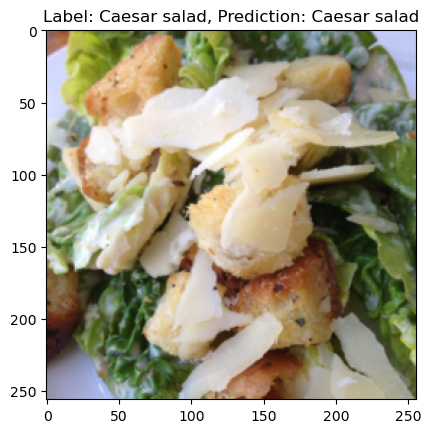

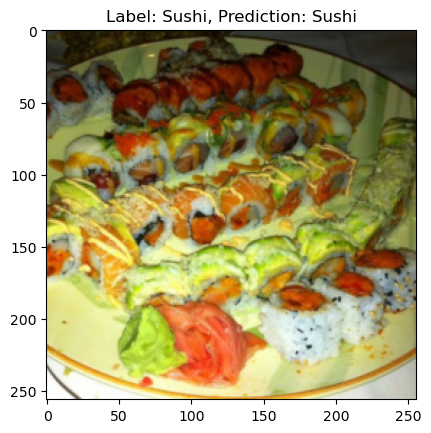

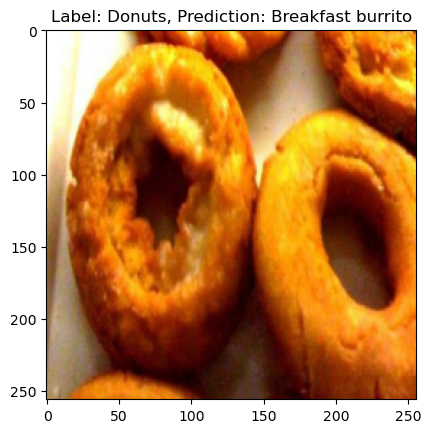

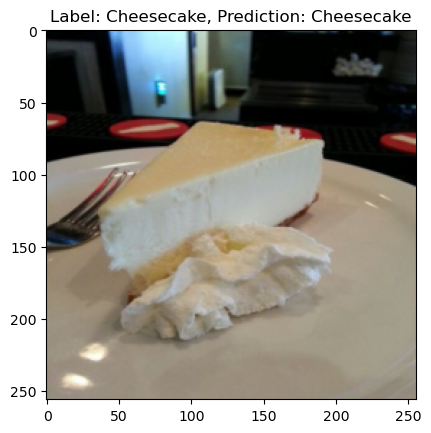

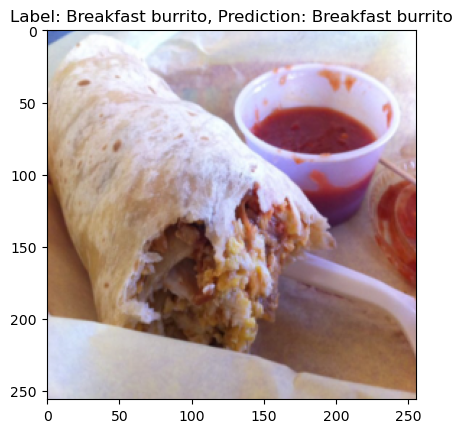

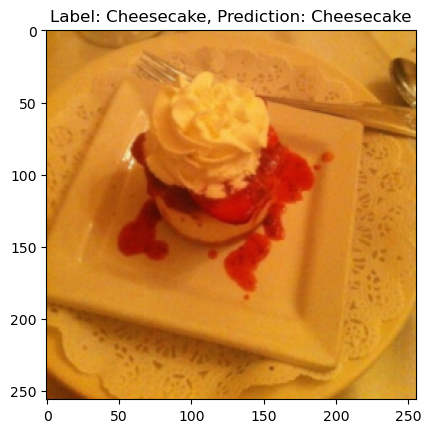

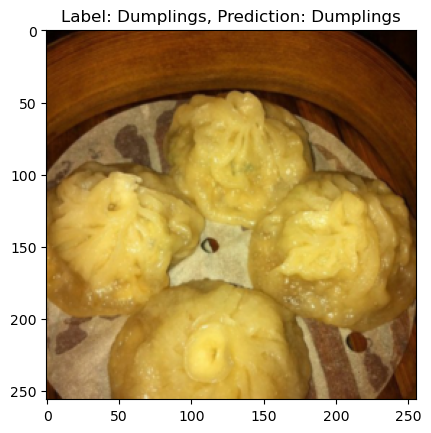

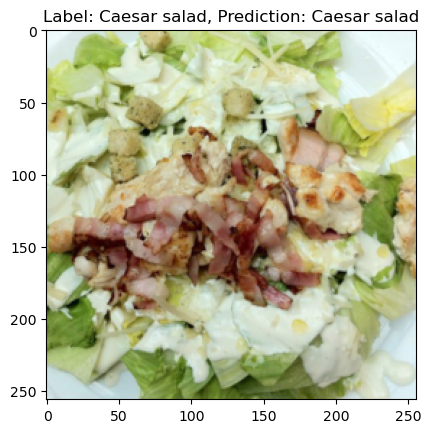

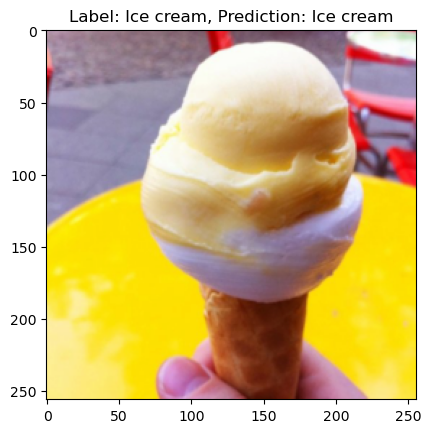

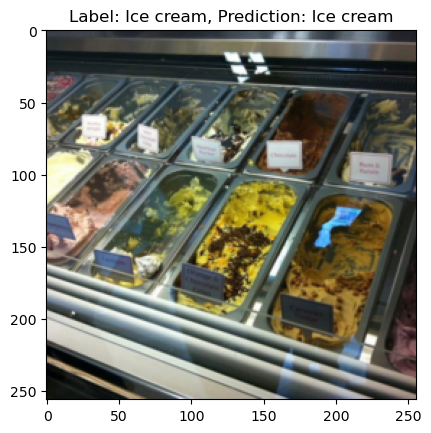

In [5]:
tester.top(10)

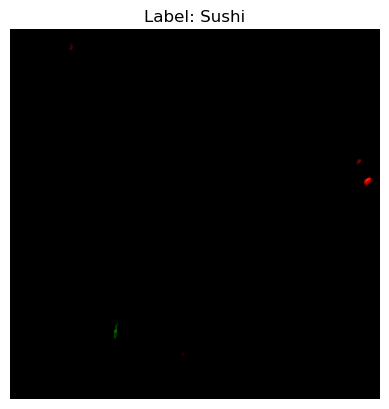

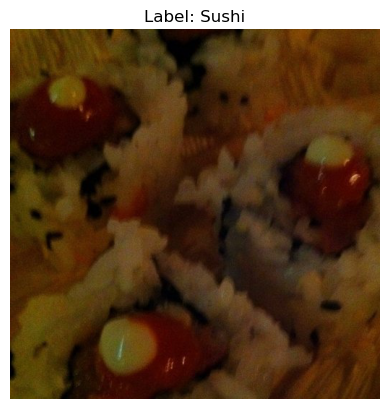

In [ ]:
import numpy as np
import random
rand_idx = random.randint(0, len(dt_train))
def plot_normalized_image(image, label):
    # Denormalize the image tensor (assuming it was normalized with mean and std)
    image = image.permute(1, 2, 0)
    image = image.clip(0, 1)  # Ensure values are in the range [0, 1]
    
    
    plt.figure()
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Example usage
plot_normalized_image(dt_train[rand_idx][0], dt_train.get_class_label(dt_train[rand_idx][1]))
plot_normalized_image(dt_original[rand_idx][0], dt_original.get_class_label(dt_original[rand_idx][1]))

In [ ]:

from evaluator import AccuracyEvaluator


settings = TrainSettings("trying_out",
                         model,
                         dt_train,
                         dt_val,
                         device="cpu",
                         lr=0.001,
                         epochs=5,
                         save_after_epoch=5,
                         eval_after_epoch=1,
                         save_path=constants.save_path,
                         print_after_steps=1,
                         print_memory=True,
                         batch_size=1)
mocklogic=MockTrainLogic(len(settings.train_data), settings.batch_size, delay=0, overfit=10 )
training = TrainingLoop(settings, TrainLogicImplementation(), "training_state.json", [AccuracyEvaluator()])
training.load_infos()
training.print_infos(True)
raise ValueError("Stop here")

Training state file training_state.json not found. Starting from scratch.
Training info about trying_out
Ellapsed time: 00:00


IndexError: list index out of range

In [ ]:
training_do1 = TrainingLoop(settings,
                            mocklogic, 
                            "training_state_dropout.json")
training_do1.load_infos()
training_do2 = TrainingLoop(settings,
                            mocklogic, 
                            "training_state_dropout2.json")
training_do2.load_infos()

Loaded training state from training_state_dropout.json
Loaded training state from training_state_dropout2.json


In [ ]:
training_do1.print_infos(True)

Training info about trying_out
Ellapsed time: 03:47:25
Training loss: 0.1685
Validation loss: 0.8368
EPOCHS
Epoch 1: training loss: 3.6792, validation loss: 2.2548 evaluations: [ACC 0.17]
Epoch 2: training loss: 2.2610, validation loss: 2.2413 evaluations: [ACC 0.17]
Epoch 3: training loss: 2.2483, validation loss: 2.2322 evaluations: [ACC 0.18]
Epoch 4: training loss: 2.2495, validation loss: 2.2150 evaluations: [ACC 0.18]
Epoch 5: training loss: 2.2173, validation loss: 2.1773 evaluations: [ACC 0.18]
Epoch 6: training loss: 2.2042, validation loss: 2.1589 evaluations: [ACC 0.19]
Epoch 7: training loss: 2.1940, validation loss: 2.1460 evaluations: [ACC 0.20]
Epoch 8: training loss: 2.1697, validation loss: 2.1361 evaluations: [ACC 0.22]
Epoch 9: training loss: 2.1621, validation loss: 2.0814 evaluations: [ACC 0.23]
Epoch 10: training loss: 2.1554, validation loss: 2.1090 evaluations: [ACC 0.21]
Epoch 11: training loss: 2.1424, validation loss: 2.0967 evaluations: [ACC 0.25]
Epoch 12: 

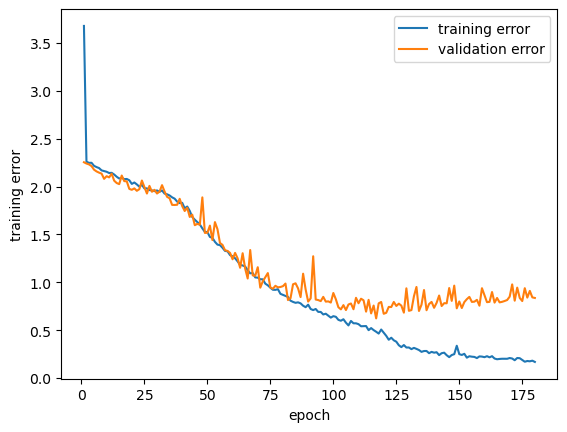

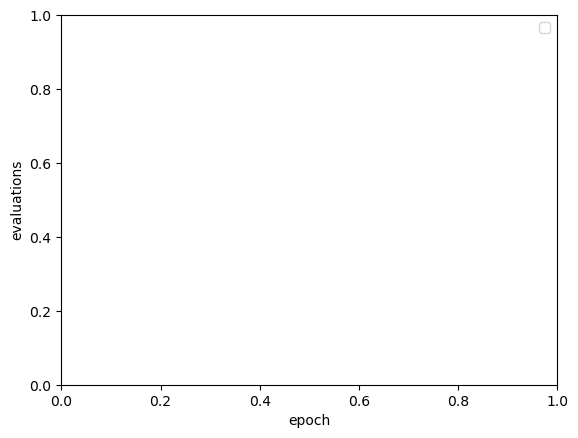

In [ ]:
training_do1.plot_losses()
training_do1.plot_evaluations()

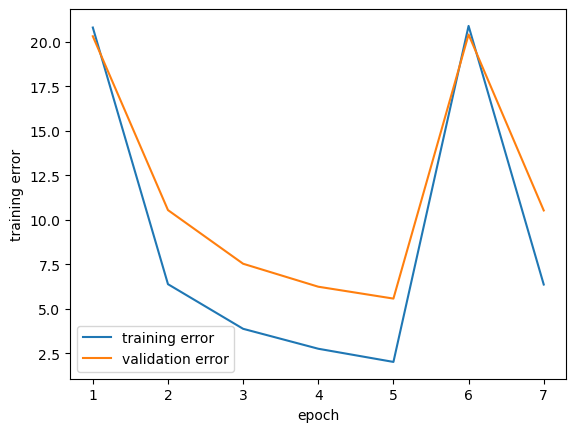

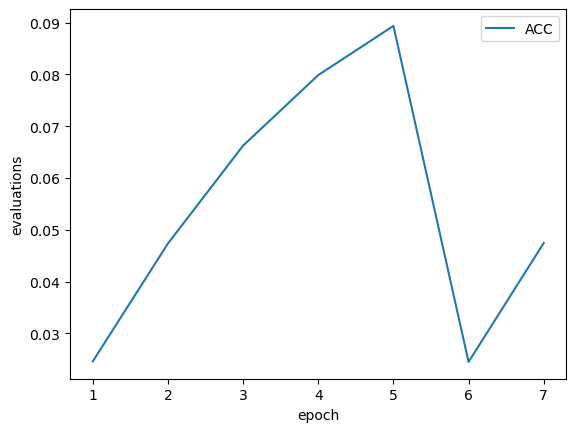

Saved training state to training.json
Loaded training state from training.json


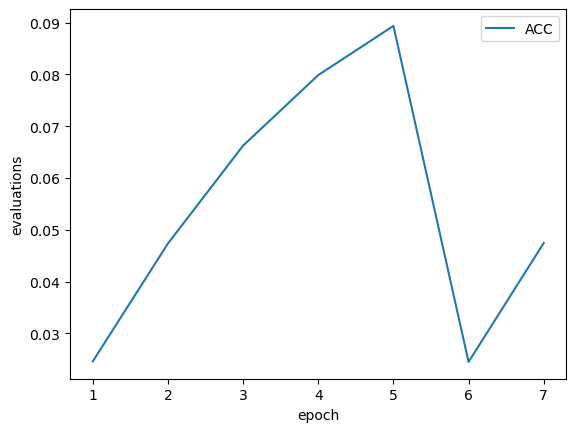

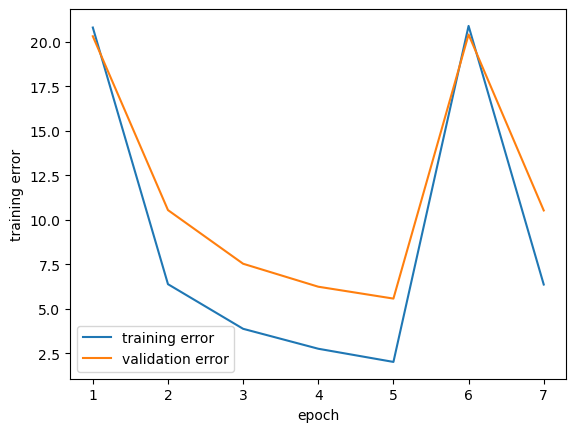

In [ ]:
training.plot_losses()
training.plot_evaluations()
training.save_infos()
training = TrainingLoop(settings, MockTrainLogic(len(settings.train_data), settings.batch_size, delay=0.0, overfit=10 ), "training.json", [AccuracyEvaluator()])
training.load_infos()
training.plot_evaluations()
training.plot_losses()

In [ ]:
#settings.print_after_steps = 1
training.current_epoch = 4
training.train(20)

Training trying_out for 20 epochs
Training on cpu
Memory usage: 0.00 MB
[20:21:39] Epoch 6 Step 1/100, Ellapsed 00:00, Train Loss: 1000.1234, ETA: 00:00
Memory usage: 0.00 MB
[20:21:39] Epoch 6 Step 2/100, Ellapsed 00:00, Train Loss: 500.2292, ETA: 00:00
Memory usage: 0.00 MB
[20:21:39] Epoch 6 Step 3/100, Ellapsed 00:00, Train Loss: 333.3945, ETA: 00:00
Memory usage: 0.00 MB
[20:21:39] Epoch 6 Step 4/100, Ellapsed 00:00, Train Loss: 250.0509, ETA: 59:59
Memory usage: 0.00 MB
[20:21:39] Epoch 6 Step 5/100, Ellapsed 00:00, Train Loss: 200.0290, ETA: 59:59
Memory usage: 0.00 MB
[20:21:39] Epoch 6 Step 6/100, Ellapsed 00:00, Train Loss: 166.5683, ETA: 59:59
Memory usage: 0.00 MB
[20:21:39] Epoch 6 Step 7/100, Ellapsed 00:00, Train Loss: 142.7181, ETA: 59:59
Memory usage: 0.00 MB
[20:21:39] Epoch 6 Step 8/100, Ellapsed 00:00, Train Loss: 125.0455, ETA: 59:58
Memory usage: 0.00 MB
[20:21:39] Epoch 6 Step 9/100, Ellapsed 00:00, Train Loss: 111.2587, ETA: 59:58
Memory usage: 0.00 MB
[20:21:39

KeyboardInterrupt: 

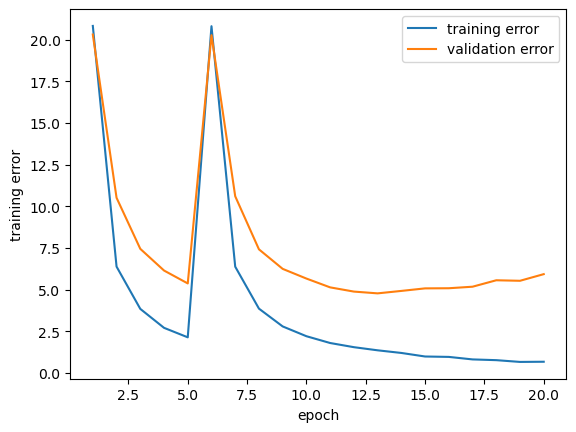

In [ ]:
def plot_losses(train_loss, val_loss):
    assert len(train_loss) == len(val_loss), "Train loss length and val loss length should be equal"
    epochs = len(train_loss)+1
    fig = plt.figure()
    plt.legend("training and validation error")
    plt.xlabel("epoch")
    plt.ylabel("training error")
    plt.plot(range(1, epochs), train_loss, label="training error")
    plt.plot(range(1, epochs), val_loss, label="validation error")
    plt.legend()
    plt.show()

plot_losses(training.tr_losses, training.val_losses)

In [ ]:
def show_image(image, label):
    plt.figure()
    plt.imshow(image.permute(1, 2, 0))
    plt.title(f"Label: {label}")
    
show_image(dt_train[799][0],dt_train.get_class_label(dt_train[799][1]))
show_image(dt_val[0][0],dt_val.get_class_label(dt_val[0][1]))

IndexError: list index out of range

In [ ]:
import random
for i in range(10):
    idx = abs(random.gauss(100, .1))
    print(i,idx)

0 99.9418941556243
1 99.82137241897459
2 99.99722225044839
3 99.90006899047438
4 99.97848849061482
5 99.9718959846959
6 100.0749465590112
7 99.96392531926236
8 99.92372433967068
9 100.05925539950456
